In [14]:
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from math import pi

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

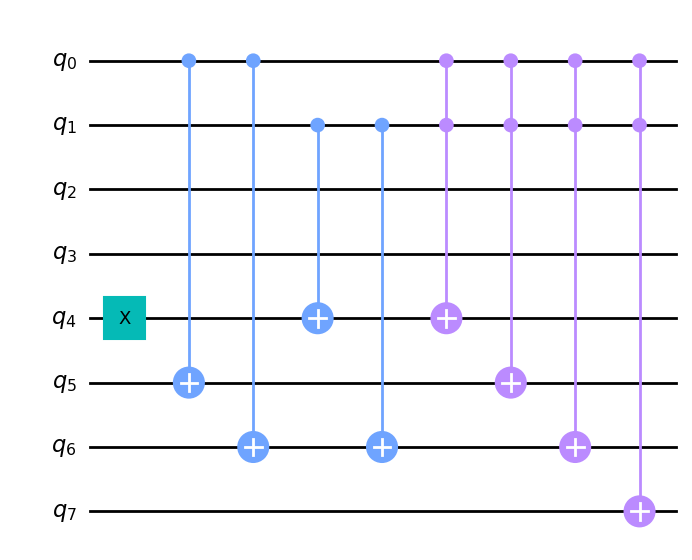

In [15]:
    Uf = QuantumCircuit(8)
    Uf.x(4)
    Uf.cx(0,5)
    Uf.cx(0,6)
    Uf.cx(1,4)
    Uf.cx(1,6)
    for i in range(4,8):
        Uf.ccx(0,1,i)
    Uf.draw()

In [16]:
def _7mod15():   
    gate = Uf.to_gate()
    gate.name = "7^x mod 15"
    return gate

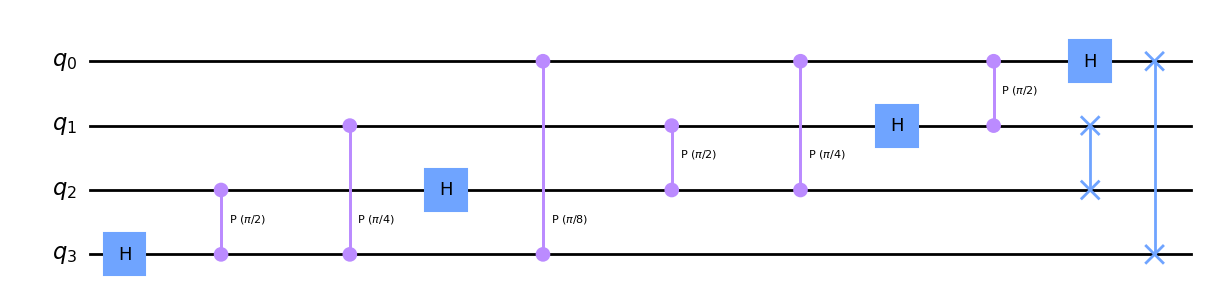

In [26]:
QFT = QuantumCircuit(4)
for i in range(3, -1, -1):
    QFT.h(i)
    for j in range(i - 1, -1, -1): 
        QFT.cp(pi/(2 ** (i - j)), j, i)
for i in range(n // 2):
    QFT.swap(i, 4 - i - 1)

In [27]:
def QFT(n):
    QFT = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        QFT.h(i)
         for j in range(i - 1, -1, -1): 
            QFT.cp(pi/(2 ** (i - j)), j, i)
    for i in range(n // 2):
        QFT.swap(i, n - i - 1)
    gate = QFT.to_gate()
    gate.name = "QFT" + str(n)
    return gate

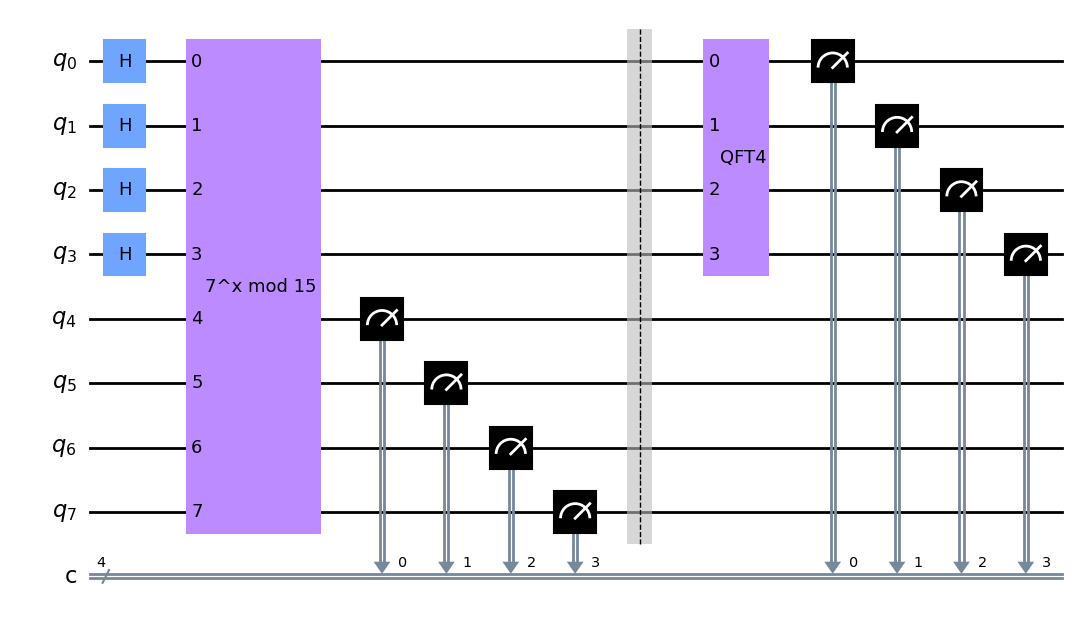

In [19]:
SH = QuantumCircuit(8,4)
SH.h(range(4))
SH.append(_7mod15(), range(8))
SH.measure(range(4,8),range(4))
SH.barrier(range(8))
SH.append(QFT(4), range(4))
SH.measure(range(4), range(4))
SH.draw()

In [20]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")
sampler = Sampler(backend)
job = sampler.run(SH)
job.result()

SamplerResult(quasi_dists=[{12: 0.25225, 8: 0.25525, 4: 0.2395, 0: 0.253}], metadata=[{'shots': 4000}])

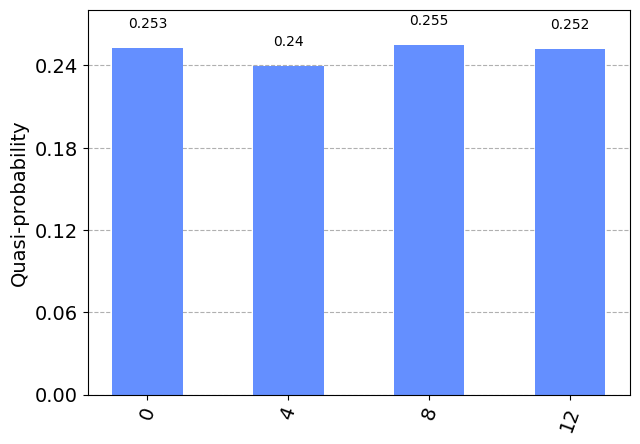

In [21]:
from qiskit.visualization import plot_histogram
plot_histogram(
    job.result().quasi_dists
)

In [22]:
import math

primer_factor = math.gcd(4-1, 15)
segundo_factor = math.gcd(4+1, 15)
print("factores primos:", primer_factor, segundo_factor)

factores primos: 3 5
